In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

pd.options.display.max_rows = 100
plt.style.use('ggplot')

In [2]:
def getDataOld(filename):
    data = pd.read_csv(filename, names=['method', 'file', 'status', 'inf_input', 'quant_input', 'cuts_in', 'inf_output', 
                                        'quant_output', 'termset', 'mingrammar', 'num_mingrammars', 'can_sol', 'min_sol', 
                                        'time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_prcons', 
                                        'time_cleanproof'])
    data = data.replace(" ", -1)
    data = data.replace(-1, np.nan)
    data = data.replace('-1', np.nan)
    
    # Setting the correct datatypes
    columns = set(data.keys())
    integer_columns = [c for c in columns if c not in ['method', 'file', 'status']]
    for c in integer_columns:
        data[c] = data[c].astype(np.float)   
    data['method'] = data['method'].astype(str)
    data['file'] = data['file'].astype(str)
    data['status'] = data['status'].astype(str)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

def getData(filename):
    data = pd.read_json(filename)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP/prover9' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        elif 'testing/TSTP/leanCoP' in s:
            return 3
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

In [3]:
filename = "results.json"
data = getData(filename)

In [4]:
# Other exceptions (aka bugs to hunt)

data_other_exp = data[data.status == 'cutintro_other_exception']
print(data_other_exp.shape)
data_other_exp[['method', 'file', 'status']]

(4249, 28)


,method,file,status
1291,1_dtable,testing/TSTP/prover9/RNG/RNG001-1/Prover9---11...,cutintro_other_exception
3037,NaN,testing/TSTP/leanCoP/SCT/SCT165+1/leanCoP---2....,cutintro_other_exception
3041,NaN,testing/TSTP/leanCoP/SCT/SCT164+1/leanCoP---2....,cutintro_other_exception
3046,NaN,testing/TSTP/leanCoP/SCT/SCT131+1/leanCoP---2....,cutintro_other_exception
3063,NaN,testing/TSTP/leanCoP/RNG/RNG125+4/leanCoP---2....,cutintro_other_exception
3086,NaN,testing/TSTP/leanCoP/RNG/RNG121+4/leanCoP---2....,cutintro_other_exception
3111,NaN,testing/TSTP/leanCoP/RNG/RNG087+2/leanCoP---2....,cutintro_other_exception
3113,NaN,testing/TSTP/leanCoP/RNG/RNG086+2/leanCoP---2....,cutintro_other_exception
3146,NaN,testing/TSTP/leanCoP/KRS/KRS193+1/leanCoP---2....,cutintro_other_exception
3151,1_dtable,testing/TSTP/leanCoP/KRS/KRS065+1/leanCoP---2....,cutintro_other_exception


In [5]:
# Test that are ok in one_cut_one_quantifier and fail for many_cuts_one_quantifier_1

data_ocoq = data[data.method == 'one_cut_one_quant']
data_mcoq1 = data[data.method == 'many_cuts_one_quant_1']

merged = pd.merge(data_ocoq, data_mcoq1, on=['file'], suffixes=('_ocoq', '_mcoq1'))

diff = merged[(merged.status_ocoq == 'ok') & (merged.status_mcoq1 != 'ok')]
print(diff.shape)
diff[['file','status_ocoq', 'status_mcoq1']]

(0, 55)


,file,status_ocoq,status_mcoq1


In [6]:
# Test that are ok in many_cuts_one_quantifier_1 and fail for one_cut_one_quantifier

data_ocoq = data[data.method == 'one_cut_one_quant']
data_mcoq1 = data[data.method == 'many_cuts_one_quant_1']

merged = pd.merge(data_ocoq, data_mcoq1, on=['file'], suffixes=('_ocoq', '_mcmq1'))

diff = merged[(merged.status_ocoq != 'ok') & (merged.status_mcmq1 == 'ok')]
print(diff.shape)
diff[['file','status_ocoq', 'status_mcmq1']]

(0, 55)


,file,status_ocoq,status_mcmq1


In [7]:
# Regressions compared to previous test

previous_filename = "../2015-03-15/CutIntroDataLog.txt"
previous_data = getDataOld(previous_filename)

merged = pd.merge(data, previous_data, on=['method', 'file'])
#merged.head(0)

regression = merged[(merged.status_y == 'ok') & (merged.status_x != 'ok')]
#regression.head(0)
print(regression.shape)

regression_delta = regression[(regression.method == 'one_cut_one_quant') | (regression.method == 'one_cut_many_quant')]
print(regression_delta.shape)
#regression_delta.head(0)

regression_maxsat = regression[((regression.method == 'many_cuts_one_quant_1') | (regression.method == 'many_cuts_one_quant_2')) ]
print(regression_maxsat.shape)
#regression_maxsat.head(0)

regression[['method', 'file', 'status_x', 'status_y']]

(0, 46)
(0, 46)
(0, 46)


,method,file,status_x,status_y


In [8]:
methods = sorted(set(data.method.dropna()))

dbs = {
    0: 'Proof examples',
    1: 'Prover9',
    2: 'VeriT',
    3: 'LeanCoP',
}

In [9]:
print("=== Number of tests per database and method:\n")

for dbi, dbname in dbs.items():
    for method in methods:
        print("{0} - {1}: {2}".format(dbname, method,
                                     data[(data.method==method) & (data.db==dbi)].shape[0]))
    print()

=== Number of tests per database and method:

Proof examples - 1_1_maxsat: 117
Proof examples - 1_dtable: 104
Proof examples - 1_maxsat: 200
Proof examples - 2_2_maxsat: 45
Proof examples - 2_maxsat: 87
Proof examples - many_dtable: 99

Prover9 - 1_1_maxsat: 2796
Prover9 - 1_dtable: 2795
Prover9 - 1_maxsat: 2796
Prover9 - 2_2_maxsat: 2793
Prover9 - 2_maxsat: 2798
Prover9 - many_dtable: 2795

VeriT - 1_1_maxsat: 142
VeriT - 1_dtable: 142
VeriT - 1_maxsat: 142
VeriT - 2_2_maxsat: 142
VeriT - 2_maxsat: 142
VeriT - many_dtable: 142

LeanCoP - 1_1_maxsat: 859
LeanCoP - 1_dtable: 859
LeanCoP - 1_maxsat: 859
LeanCoP - 2_2_maxsat: 859
LeanCoP - 2_maxsat: 859
LeanCoP - many_dtable: 859



In [10]:
states = set(data.status.values)
status_colors = {}
for s in data.status.values:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s.endswith('timeout'):
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

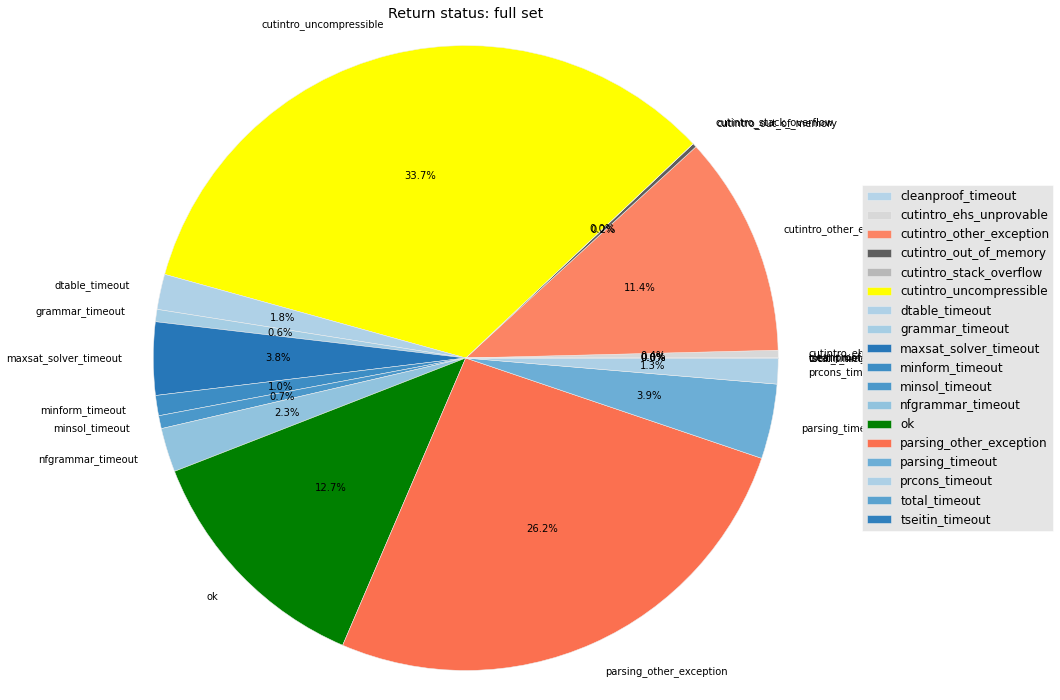

In [11]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

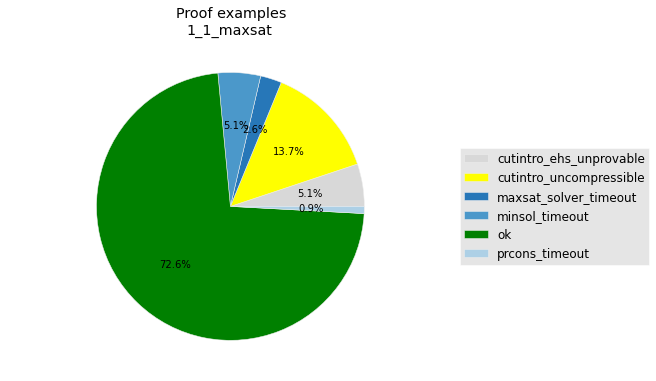

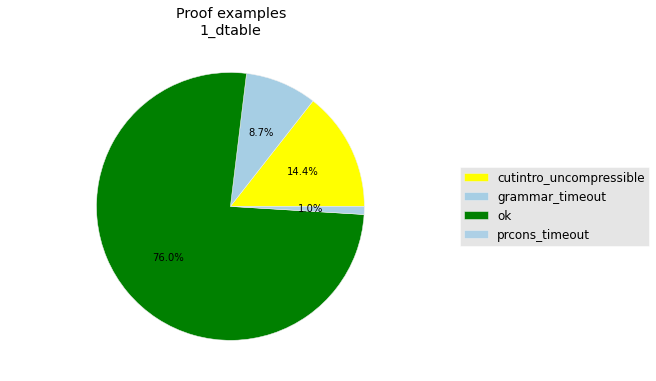

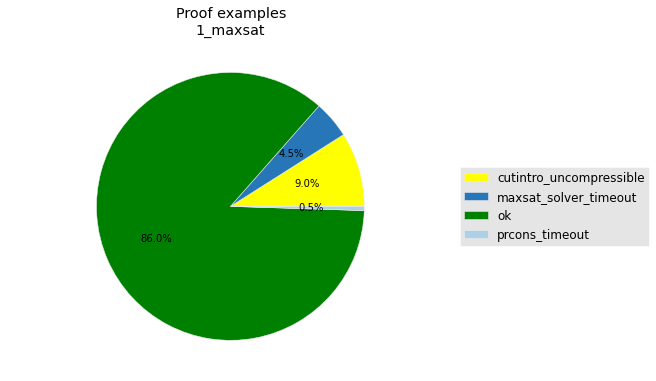

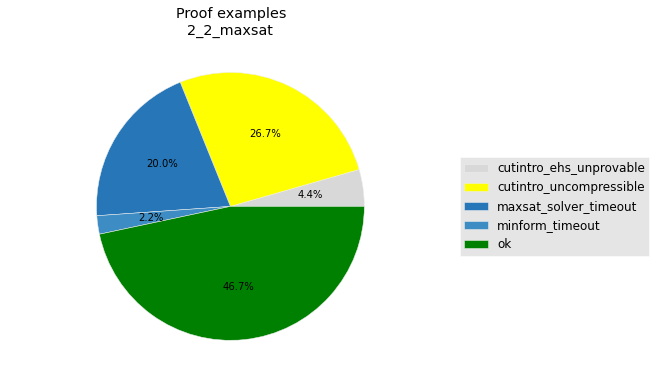

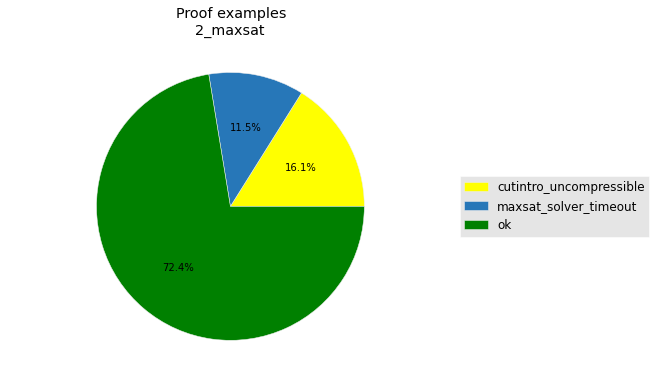

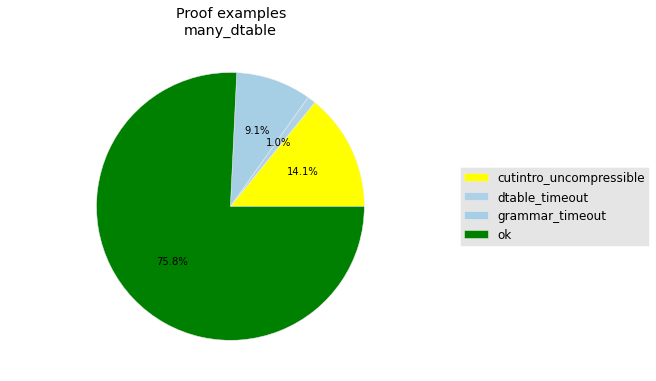

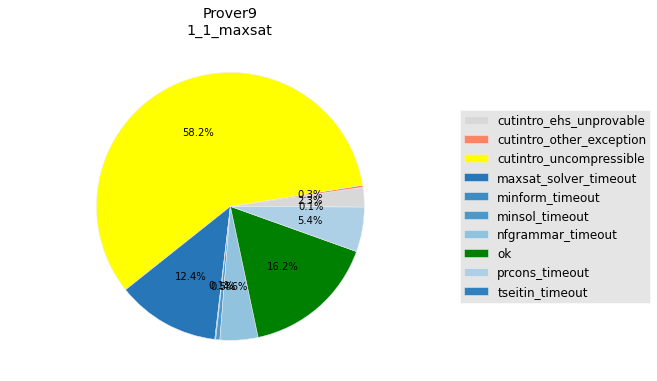

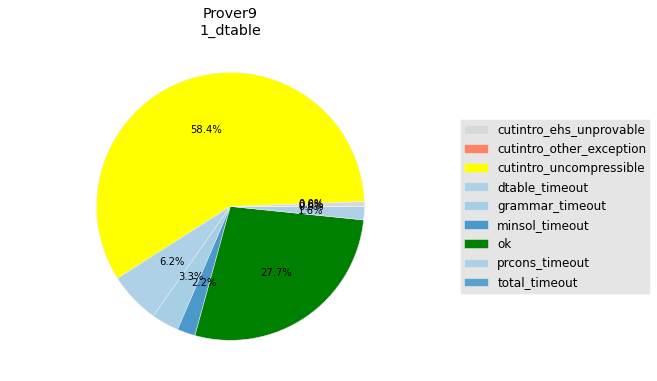

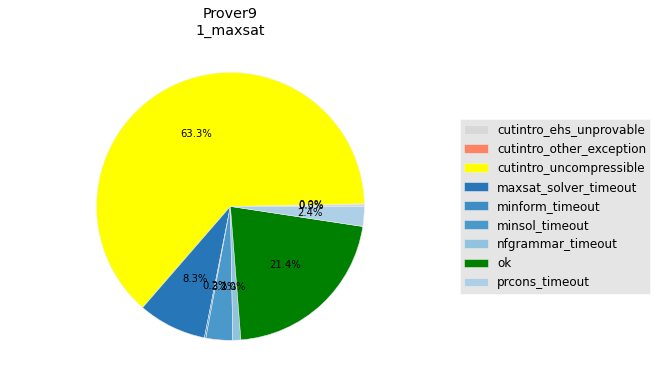

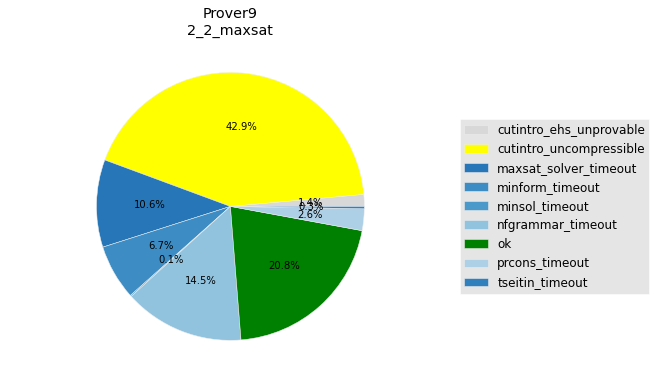

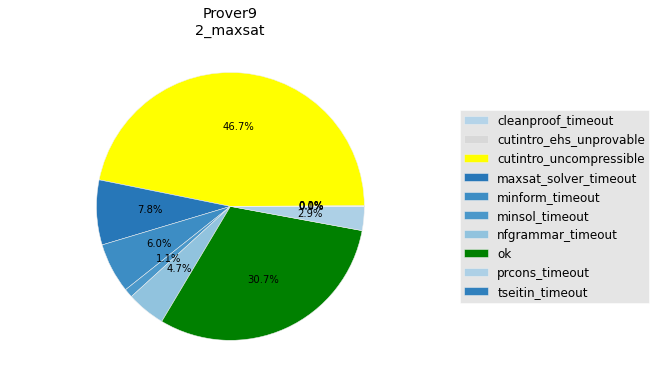

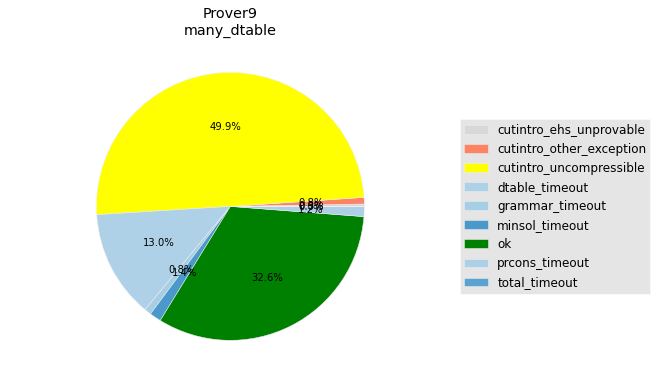

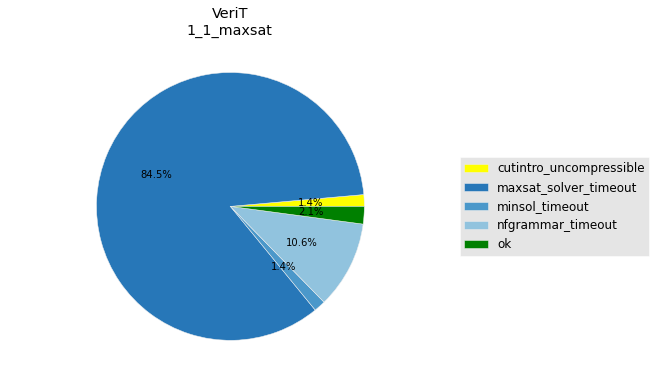

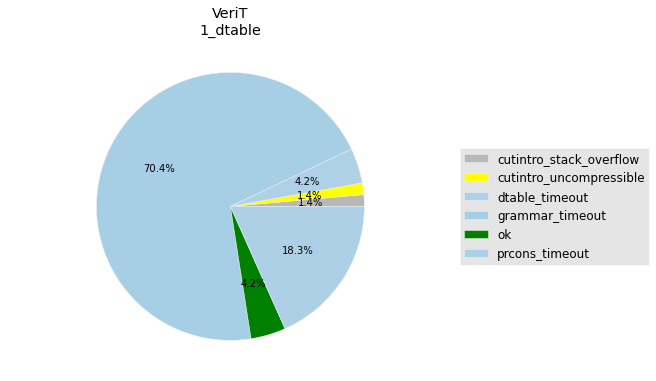

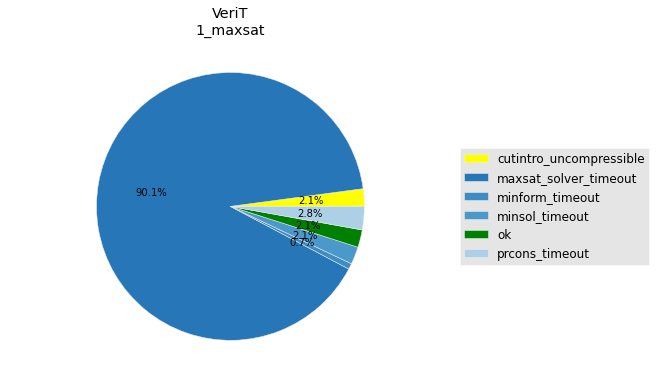

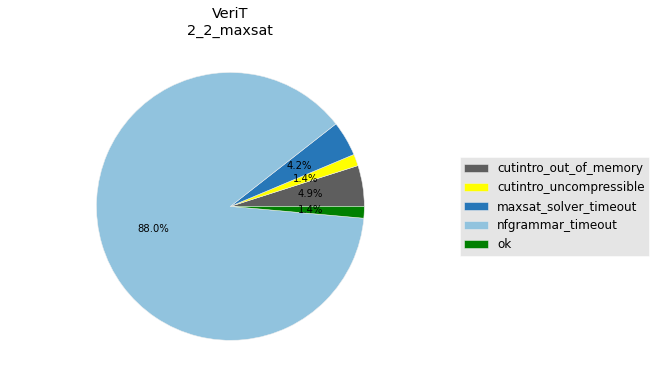

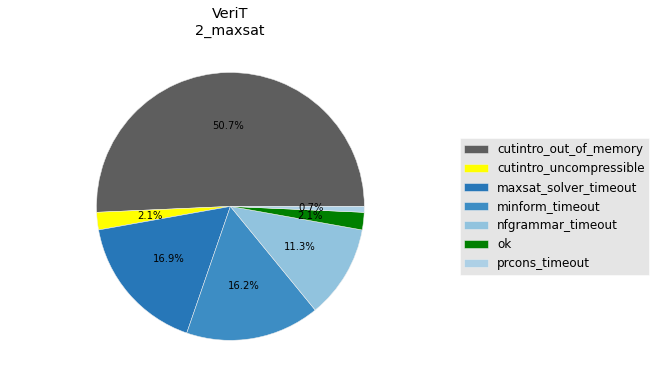

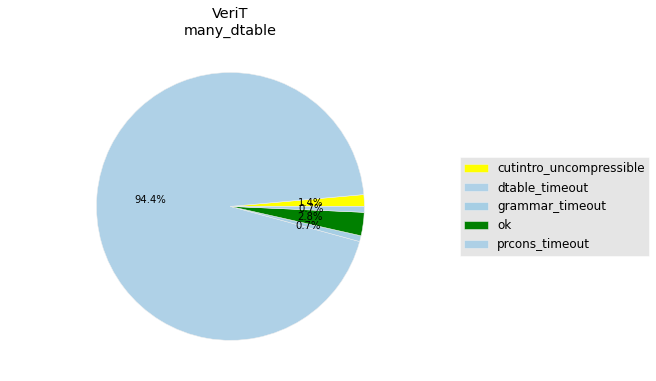

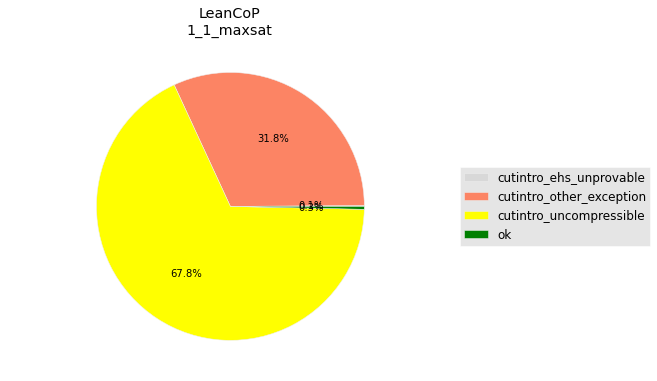

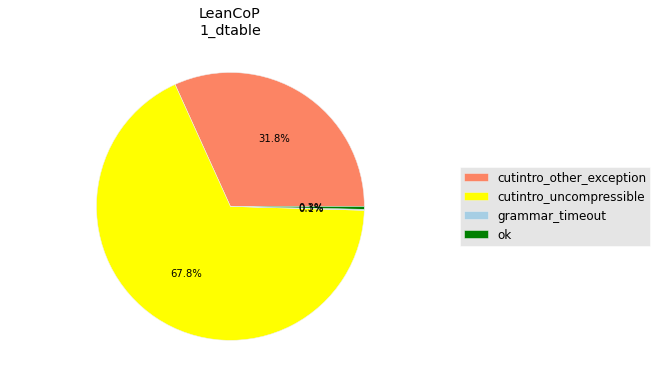

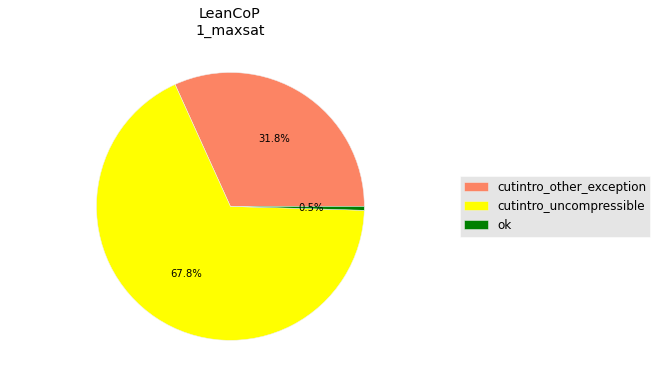

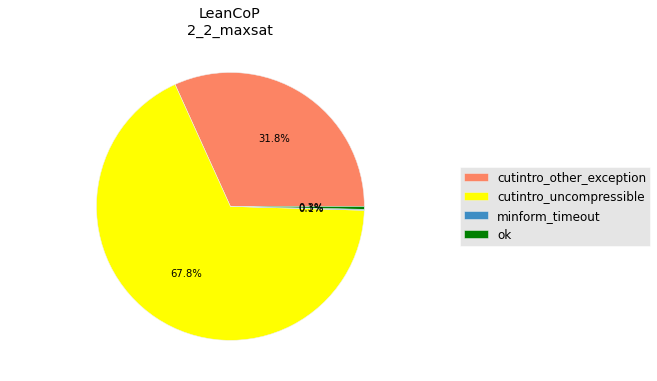

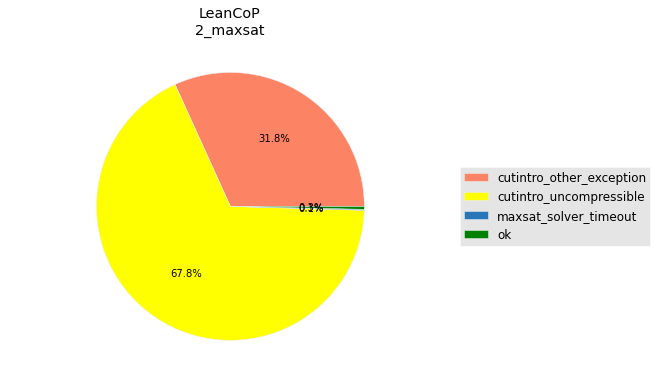

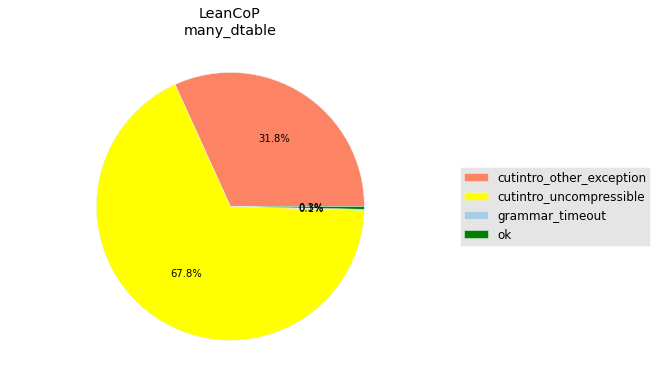

In [12]:
for dbi, db in dbs.items():
    for method in methods:
        subdata = data[(data.db==dbi) & (data.method==method)].groupby('status').size()
        plot_status(subdata, title='{0}\n{1}'.format(db,method), labels=None, figsize=(8,6))
        plt.show()

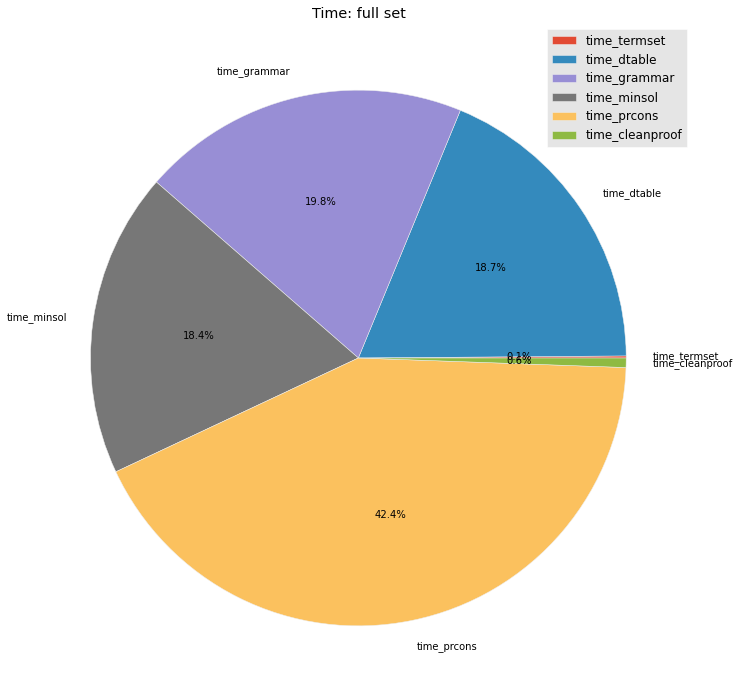

In [13]:
timecols = ['time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_prcons', 'time_cleanproof']
plt.axis('equal')
data[timecols].mean().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%',
                           title='Time: full set', legend=True).set_ylabel('')

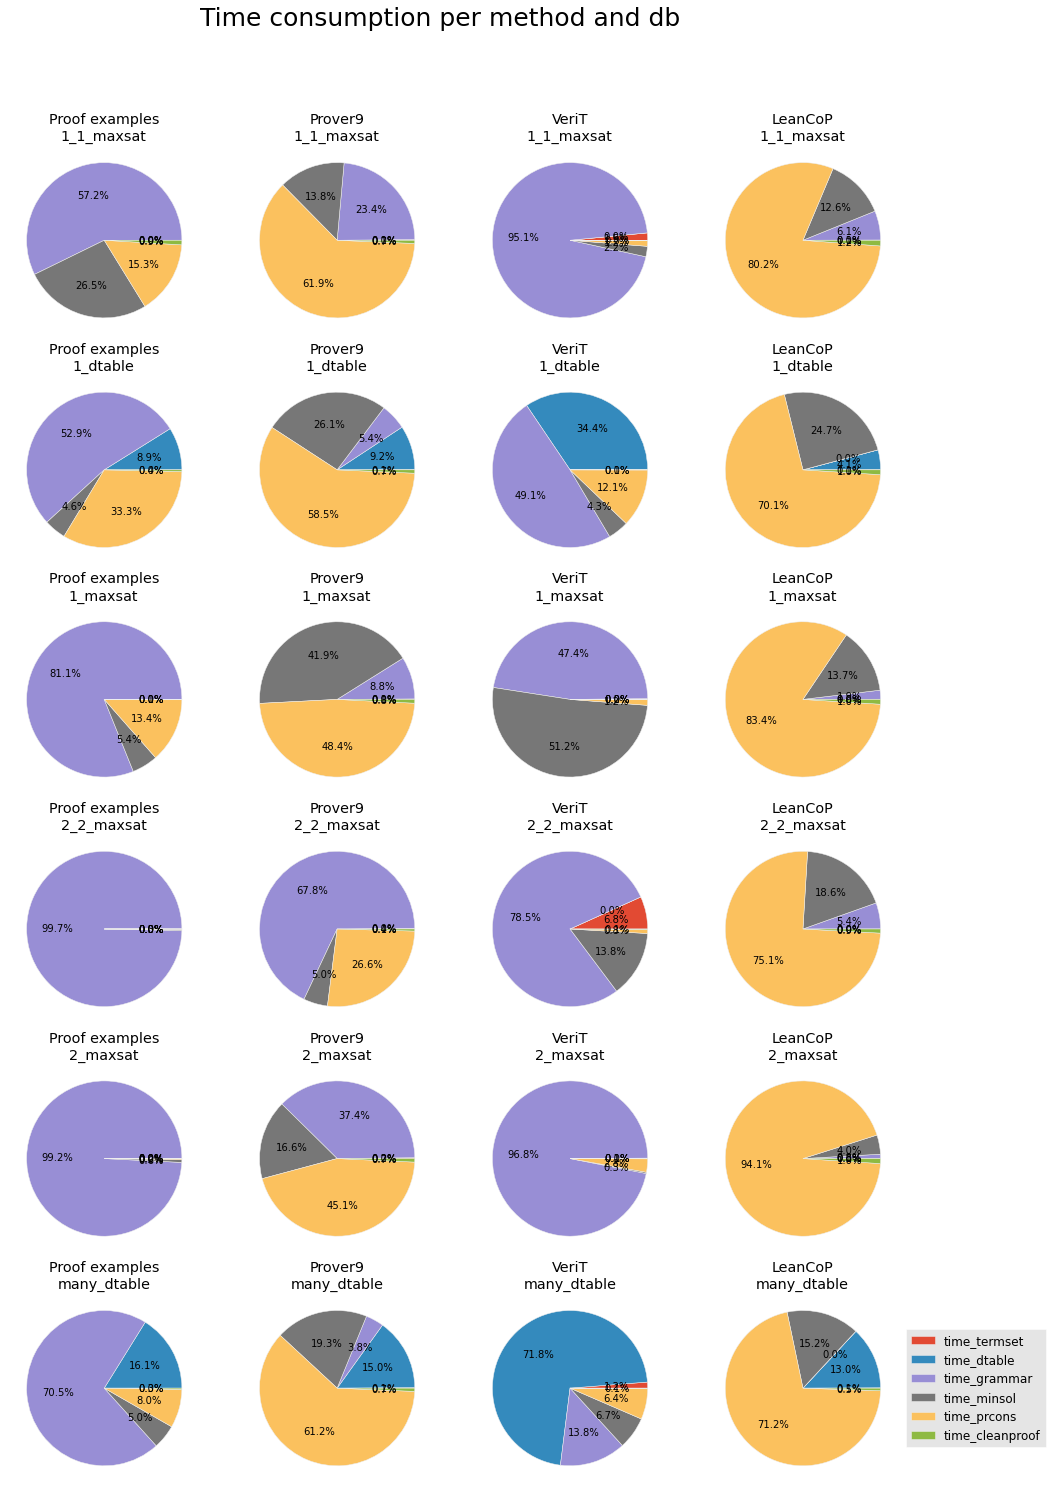

In [14]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        data[(data.db==dbi) & (data.method==method)][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method)).set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

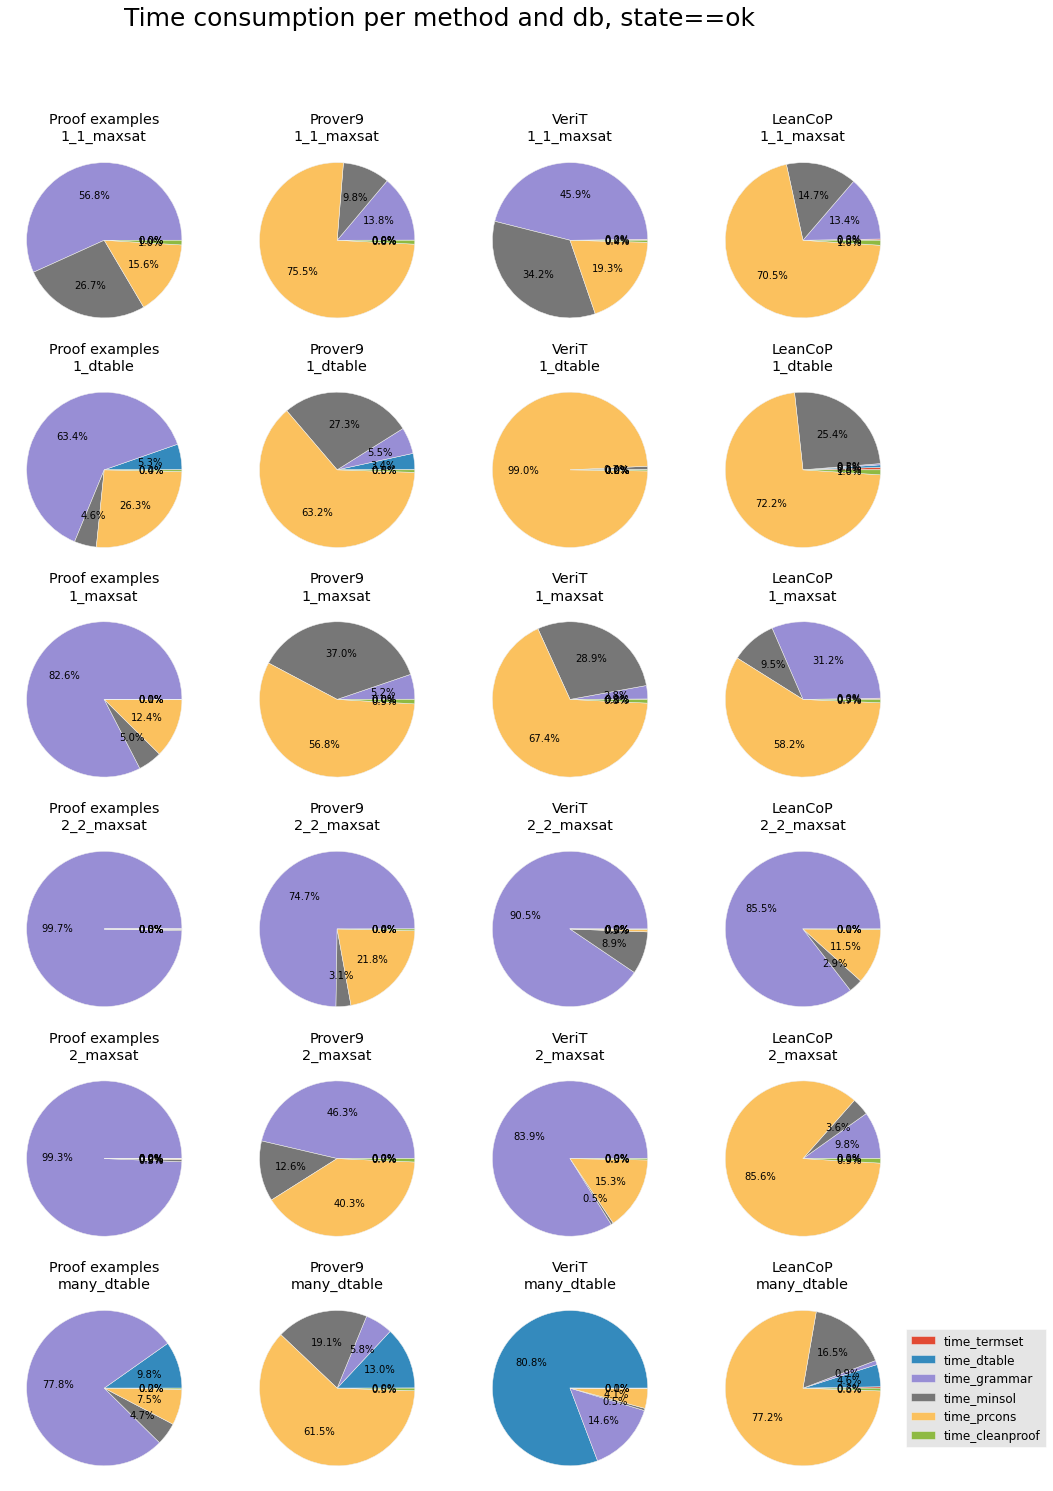

In [15]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db, state==ok', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        ax = data[(data.db==dbi) & (data.method==method) & (data.status=='ok')][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method))
        ax.set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
# For Daniel
more_than_one_cut = data[(data.cuts_in > 1)]
print(more_than_one_cut.shape)
more_than_one_cut

(2677, 28)


,can_sol,cuts_in,file,inf_input,inf_output,method,min_sol,minform_lcomp,mingrammar,nfgrammar,...,time_maxsat,time_maxsat_solver,time_minform,time_minsol,time_nfgrammar,time_prcons,time_termset,time_total,time_tseitin,db
110,10,32,testing/TSTP/prover9/SWV/SWV480+1/Prover9---11...,225,202,1_dtable,5,NaN,27,NaN,...,NaN,NaN,NaN,39,NaN,236,4,994,NaN,1
123,10,43,testing/TSTP/prover9/SWV/SWV466+1/Prover9---11...,427,319,1_dtable,5,NaN,36,NaN,...,NaN,NaN,NaN,36,NaN,356,2,1397,NaN,1
124,13,182,testing/TSTP/prover9/GEO/GEO070-3/Prover9---11...,935,879,1_dtable,13,NaN,45,NaN,...,NaN,NaN,NaN,16,NaN,1303,5,2453,NaN,1
131,8,4,testing/TSTP/prover9/GRP/GRP729-1/Prover9---11...,87,118,1_dtable,4,NaN,18,NaN,...,NaN,NaN,NaN,1369,NaN,109,1,1564,NaN,1
140,13,62,testing/TSTP/prover9/MGT/MGT054+1/Prover9---11...,334,280,1_dtable,13,NaN,21,NaN,...,NaN,NaN,NaN,9,NaN,133,1,365,NaN,1
141,39,674,testing/TSTP/prover9/MGT/MGT005-1/Prover9---11...,1540,3283,1_dtable,39,NaN,32,NaN,...,NaN,NaN,NaN,49,NaN,7772,3,13264,NaN,1
144,9,7,testing/TSTP/prover9/KLE/KLE150+2/Prover9---11...,124,150,1_dtable,7,NaN,14,NaN,...,NaN,NaN,NaN,28,NaN,84,1,205,NaN,1
146,14,139,testing/TSTP/prover9/MGT/MGT055-1/Prover9---11...,577,627,1_dtable,14,NaN,32,NaN,...,NaN,NaN,NaN,8,NaN,780,2,1332,NaN,1
159,8,7,testing/TSTP/prover9/KLE/KLE035+2/Prover9---11...,122,97,1_dtable,6,NaN,17,NaN,...,NaN,NaN,NaN,80,NaN,92,0,277,NaN,1
160,4,87,testing/TSTP/prover9/SEU/SEU340+1/Prover9---11...,541,417,1_dtable,2,NaN,29,NaN,...,NaN,NaN,NaN,29,NaN,561,2,1529,NaN,1


In [17]:
data['status'].value_counts()

cutintro_uncompressible     12525
parsing_other_exception      9765
ok                           4708
cutintro_other_exception     4249
parsing_timeout              1440
maxsat_solver_timeout        1403
nfgrammar_timeout             848
dtable_timeout                679
prcons_timeout                483
minform_timeout               389
minsol_timeout                249
grammar_timeout               236
cutintro_ehs_unprovable       146
cutintro_out_of_memory         79
tseitin_timeout                11
cleanproof_timeout              2
cutintro_stack_overflow         2
total_timeout                   2
dtype: int64

In [18]:
# Different grammar sizes between different methods: one cut with one quantifier
data[(data.mingrammar >= 0) & ((data.method == 'one_cut_one_quant') | (data.method == 'many_cuts_one_quant_1'))] \
    .groupby('file') \
    .filter(lambda x: len(set(x.mingrammar)) > 1) \
    .sort('file')[['file', 'method', 'mingrammar']]

,file,method,mingrammar


In [19]:
# Different grammar sizes between different methods: one cut with 2/many quantifiers
data[(data.mingrammar >= 0) & ((data.method == 'one_cut_many_quant') | (data.method == 'many_cuts_many_quant_2'))] \
    .groupby('file') \
    .filter(lambda x: len(set(x.mingrammar)) > 1) \
    .sort('file')[['file', 'method', 'mingrammar']]

,file,method,mingrammar


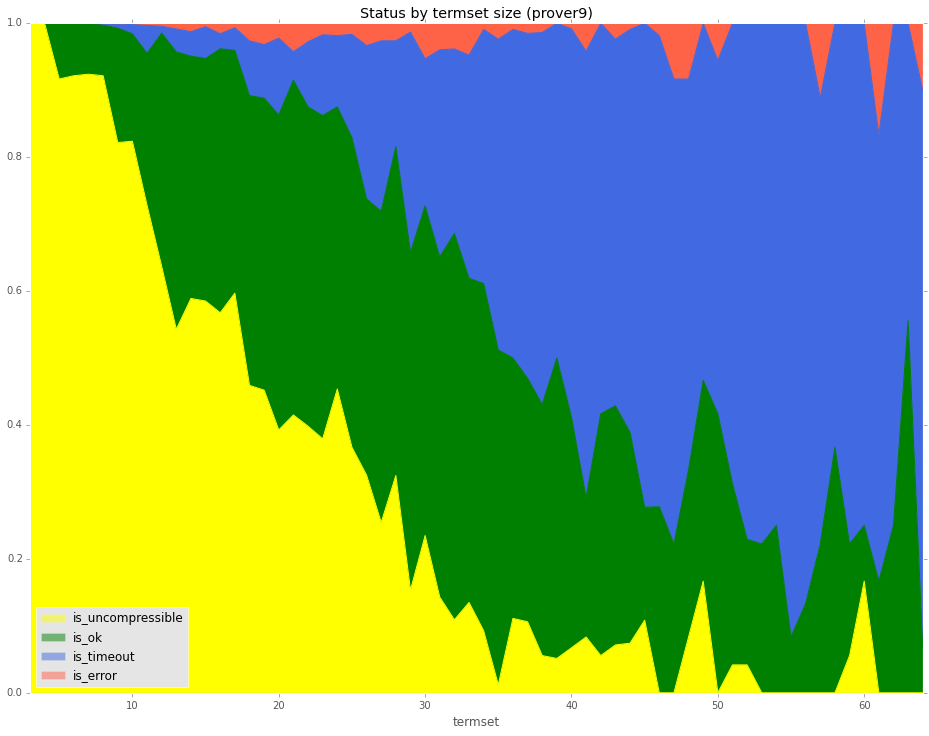

In [20]:
data['is_ok'] = data.status=='ok'
data['is_uncompressible'] = data.status.str.endswith('uncompressible')
data['is_timeout'] = data.status.str.endswith('timeout')
data['is_error'] = ~data.is_ok & ~data.is_uncompressible & ~data.is_timeout

data[(data.termset<65)&(data.db==1)].groupby('termset').mean() \
    [['is_uncompressible', 'is_ok', 'is_timeout', 'is_error']] \
    .plot(kind='area', figsize=(16,12), ylim=(0,1), title='Status by termset size (prover9)',
          color=['yellow', 'green', 'royalblue', 'tomato'])

In [21]:
# Proofs with good compression
data[data.inf_output < 0.1*data.inf_input]

,can_sol,cuts_in,file,inf_input,inf_output,method,min_sol,minform_lcomp,mingrammar,nfgrammar,...,time_nfgrammar,time_prcons,time_termset,time_total,time_tseitin,db,is_ok,is_uncompressible,is_timeout,is_error
627,16,1,testing/TSTP/prover9/SET/SET788+1/Prover9---11...,4629,360,1_dtable,16,NaN,12,NaN,...,NaN,25,0,1549,NaN,1,True,False,False,False
834,16,1,testing/TSTP/prover9/SET/SET047-5/Prover9---11...,4629,428,1_dtable,16,NaN,12,NaN,...,NaN,32,1,1645,NaN,1,True,False,False,False
900,4,8,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,845,56,1_dtable,2,NaN,34,NaN,...,NaN,133,2,1886,NaN,1,True,False,False,False
1157,16,1,testing/TSTP/prover9/SET/SET047+1/Prover9---11...,4629,360,1_dtable,16,NaN,12,NaN,...,NaN,35,1,1569,NaN,1,True,False,False,False
2947,28,39,testing/TSTP/prover9/SET/SET887+1/Prover9---11...,2671,202,1_dtable,26,NaN,31,NaN,...,NaN,93,2,2932,NaN,1,True,False,False,False
6652,8,4,testing/TSTP/prover9/SCT/SCT080-1/Prover9---11...,292,24,many_dtable,4,NaN,23,NaN,...,NaN,121,2,858,NaN,1,True,False,False,False
6683,9,1,testing/TSTP/prover9/BOO/BOO011-4/Prover9---11...,271,14,many_dtable,5,NaN,26,NaN,...,NaN,47,1,293,NaN,1,True,False,False,False
7093,4,8,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,845,56,many_dtable,2,NaN,34,NaN,...,NaN,134,1,1897,NaN,1,True,False,False,False
9140,28,39,testing/TSTP/prover9/SET/SET887+1/Prover9---11...,2671,202,many_dtable,26,NaN,31,NaN,...,NaN,93,2,3005,NaN,1,True,False,False,False
13387,8,12,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,845,78,1_maxsat,6,834,34,94,...,4,88,2,1912,3,1,True,False,False,False


In [22]:
# Proofs with blowup
data[data.inf_output > 1000*data.inf_input]

,can_sol,cuts_in,file,inf_input,inf_output,method,min_sol,minform_lcomp,mingrammar,nfgrammar,...,time_nfgrammar,time_prcons,time_termset,time_total,time_tseitin,db,is_ok,is_uncompressible,is_timeout,is_error
18737,16,2,SquareEdgesExampleProof(12),83,176496,1_1_maxsat,20,19331,11,108,...,27,26255,1,28879,46,0,True,False,False,False
18742,16,2,SquareEdgesExampleProof(17),118,176547,1_1_maxsat,20,52261,12,153,...,91,32961,1,41961,148,0,True,False,False,False


In [23]:
# Proofs with an interesting number of cuts
data[data.cuts_in > 5000]

,can_sol,cuts_in,file,inf_input,inf_output,method,min_sol,minform_lcomp,mingrammar,nfgrammar,...,time_nfgrammar,time_prcons,time_termset,time_total,time_tseitin,db,is_ok,is_uncompressible,is_timeout,is_error
13323,41,5681,testing/TSTP/prover9/CAT/CAT009-1/Prover9---11...,318,33906,1_maxsat,41,715,22,52,...,3,36126,2,36742,2,1,True,False,False,False
26478,32,5204,testing/TSTP/prover9/GEO/GEO009-3/Prover9---11...,119,45568,2_maxsat,32,3074,14,88,...,3,29243,1,29896,15,1,True,False,False,False
27572,26,7109,testing/TSTP/prover9/LAT/LAT302+1/Prover9---11...,235,72794,2_maxsat,26,1223,22,98,...,5,52702,1,54002,6,1,True,False,False,False
32371,13,9592,testing/TSTP/prover9/CAT/CAT014-3/Prover9---11...,181,86033,2_2_maxsat,13,22946,11,277,...,8,44783,0,47618,164,1,True,False,False,False
33340,26,7101,testing/TSTP/prover9/LAT/LAT303+1/Prover9---11...,268,72758,2_2_maxsat,26,5256,21,179,...,111,53890,1,55612,25,1,True,False,False,False


In [24]:
ax = (data.time_maxsat/data.time_grammar).dropna().plot(kind='hist', figsize=(14,8),
    title='Percentage of grammar finding time spent in MaxSAT solver', bins=20)
ax.set_xlabel('percentage')
ax.set_ylabel('number of testcases')

ValueError: Invalid chart type given hist